In [3]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.utils import resample
# Reading in csv
df = pd.read_csv('final_data_2.csv')

# Data cleaning
def clean_numeric(val):
    if isinstance(val, str):
        if val.strip() == 'Computation time out':
            return np.nan
        try:
            return float(val)
        except ValueError:
            return np.nan
    return val

# Apply cleaning to all columns except 'Adjacency Matrix'
for col in df.columns:
    if col != 'Adjacency Matrix':
        df[col] = df[col].apply(clean_numeric)

# Drop columns with NaN values
df = df.dropna(axis=1)



# Separate features and target


df_majority = df[df['Binary Resistance Curvature'] == 0]
df_minority = df[df['Binary Resistance Curvature'] == 1]
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # 不放回采样
                                   n_samples=len(df_minority), # 使数量等于少数类样本数量
                                   random_state=42)  # 固定随机种子

df_balanced = pd.concat([df_minority, df_majority_downsampled])

X = df_balanced.drop(['Binary Resistance Curvature', 'Adjacency Matrix', 
             'Number of 3-gons', 'Number of 4-gons', 'Number of 5-gons', 
             'Number of 6-gons', 'Number of 7-gons', 'Number of 8-gons', 
             'Number of 9-gons', 'Number of 10-gons', 'Number of 11-gons', 
             'Number of 12-gons'], axis=1)
y = df_balanced['Binary Resistance Curvature']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
print(np.mean(y_train),np.mean(y_test))
print(len(y_train),len(y_test))
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

torch.set_default_dtype(torch.float64)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
X_train_tensor = torch.tensor(X_train)
X_test_tensor = torch.tensor(X_test)
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)

X_train_tensor = X_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

dataset = {
    'train_input': X_train_tensor,      
    'train_label': y_train_tensor,      
    'test_input': X_test_tensor,        
    'test_label': y_test_tensor 
}

0.4874476987447699 0.55
478 120
cpu


In [32]:
#Define the accuracy score
from sklearn.metrics import accuracy_score
import torch

def calculate_accuracy(model, X_train_tensor, y_train, X_test_tensor, y_test, threshold=0.5):
    train_predict = torch.argmax(model.forward(X_train_tensor).detach(),dim=1)
    print(train_predict)
    train_accuracy = accuracy_score(train_predict, y_train)
    test_predict = torch.argmax(model.forward(X_test_tensor).detach(),dim=1)
    test_accuracy = accuracy_score(test_predict, y_test)
    return train_accuracy, test_accuracy


In [33]:
def train_acc():
    preds = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((preds == dataset['train_label']).float())
def test_acc():
    preds = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((preds == dataset['test_label']).float())
model = KAN(width=[29,4,2], grid=3, k=3, seed=42, device=device)
result=model.fit(dataset, opt="LBFGS", steps=100,lamb=0.0001, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
train, test = calculate_accuracy(model, X_train_tensor, y_train, X_test_tensor, y_test)
print(f"Train Accuracy: {train}")
print(f"Test Accuracy: {test}")
formula=model.symbolic_formula()
print(formula)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.64e-02 | test_loss: 3.20e-02 | reg: 5.42e+01 | : 100%|█| 100/100 [00:35<00:00,  2.80

saving model version 0.1
tensor([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1

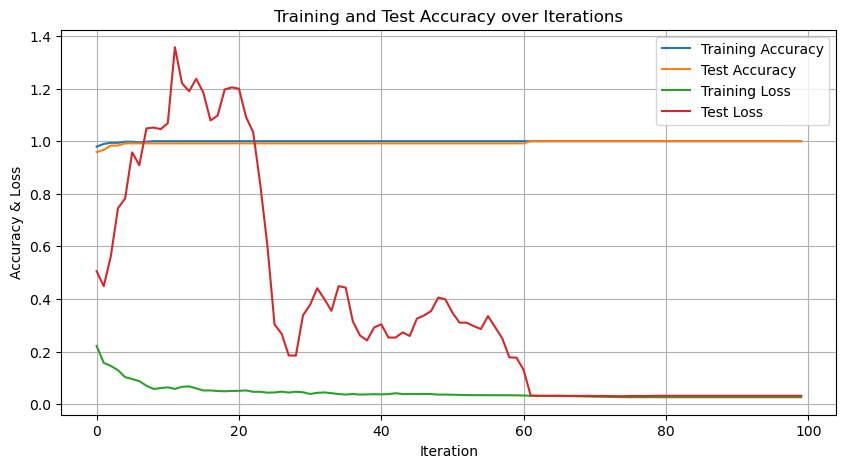

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(result["train_acc"], label='Training Accuracy')
plt.plot(result["test_acc"], label='Test Accuracy')
plt.plot(result["train_loss"], label='Training Loss')
plt.plot(result["test_loss"], label='Test Loss')
plt.title('Training and Test Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy & Loss')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'feature attribution score')

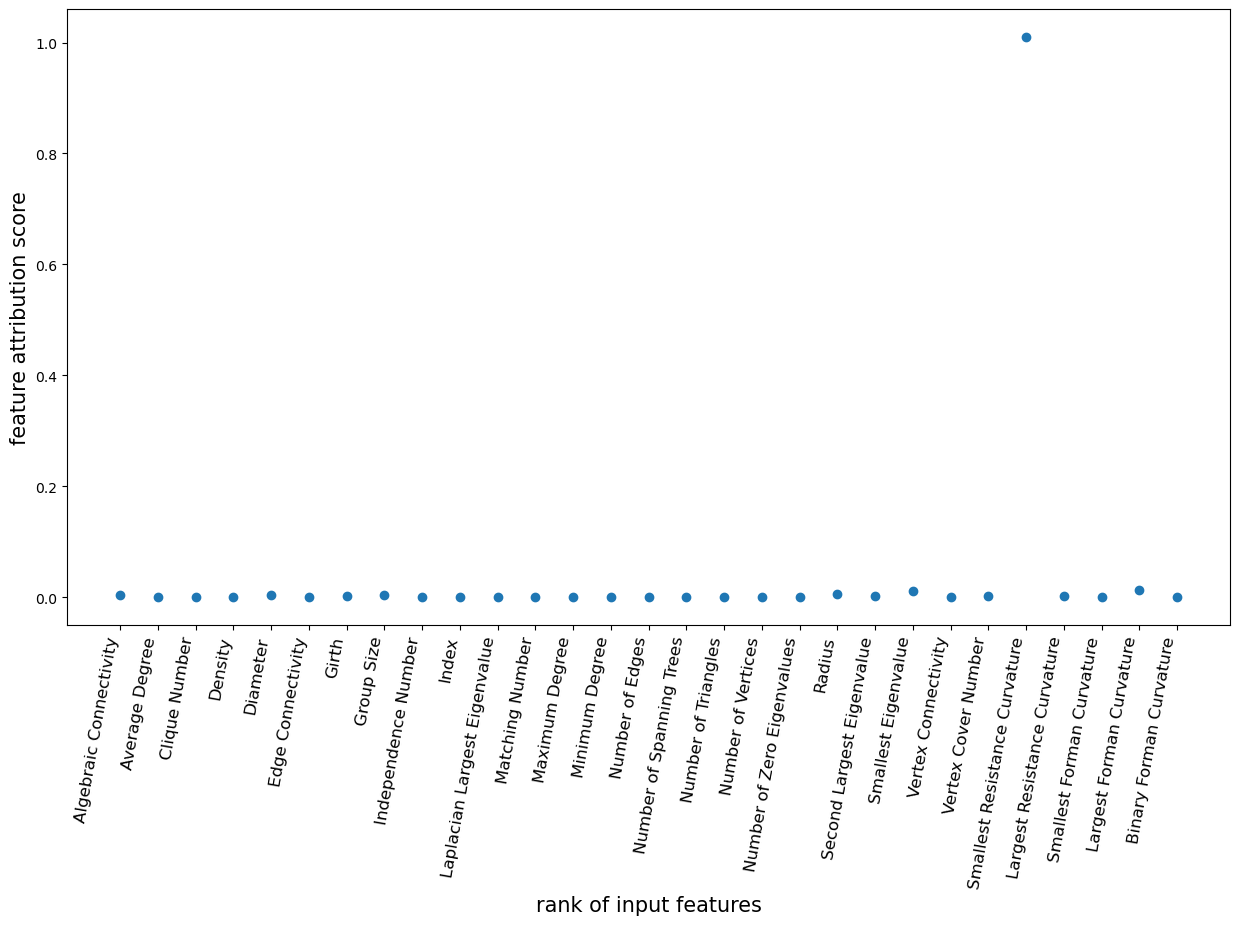

In [35]:
import matplotlib.pyplot as plt
feature_names = X.columns
plt.figure(figsize=(15, 8))
plt.scatter(np.arange(29)+1, model.feature_score.detach().numpy())
plt.xticks(ticks=np.arange(29) + 1, labels=feature_names, rotation=80, ha='right', fontsize=12)
plt.xlabel('Input Features', fontsize=15)
plt.xlabel('rank of input features', fontsize=15)
plt.ylabel('feature attribution score', fontsize=15)

In [37]:
mode = "auto"
if mode == "auto":
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)
formula=model.symbolic_formula()
print(formula)
train, test = calculate_accuracy(model, X_train_tensor, y_train, X_test_tensor, y_test)
print(f"Train Accuracy: {train}")
print(f"Test Accuracy: {test}")

fixing (0,0,0) with x, r2=0.016258822294332478, c=1
fixing (0,0,1) with x, r2=0.06617401125177938, c=1
fixing (0,0,2) with x, r2=0.10321064241884567, c=1
fixing (0,0,3) with x, r2=0.0017752553139911164, c=1
fixing (0,1,0) with sin, r2=0.995917976320313, c=2
fixing (0,1,1) with x, r2=0.8525338675534958, c=1
fixing (0,1,2) with sin, r2=0.9588824325052278, c=2
fixing (0,1,3) with x, r2=0.054756101232651413, c=1
fixing (0,2,0) with x^2, r2=0.9999971797640296, c=2
fixing (0,2,1) with x^2, r2=0.999999898446378, c=2
fixing (0,2,2) with x^2, r2=0.9999999540969408, c=2
fixing (0,2,3) with x^2, r2=0.999999959480366, c=2
fixing (0,3,0) with x, r2=0.04165366996579166, c=1
fixing (0,3,1) with exp, r2=0.9911221520117077, c=2
fixing (0,3,2) with x, r2=0.0015723096377812285, c=1
fixing (0,3,3) with x, r2=0.04601644614282399, c=1
fixing (0,4,0) with x, r2=0.011949102112452347, c=1
fixing (0,4,1) with sin, r2=0.9705940407841946, c=2
fixing (0,4,2) with x, r2=0.026459040499400673, c=1
fixing (0,4,3) with

In [38]:
formula=model.symbolic_formula()
print(formula) 

([0.0925047440399718*x_1 - 0.00539697184310255*x_10 - 0.00279930563042161*x_11 - 0.0346543842237814*x_15 + 0.248356103555577*x_16 - 0.00686147442856416*x_17 - 0.00568952647841082*x_2 - 0.105921363756093*x_20 - 0.00599113348031377*x_22 + 0.00934728233163143*x_23 - 0.0188807281809543*x_26 + 0.0115742482584944*x_27 - 0.0295314562150812*x_29 + 0.0127777690960954*x_6 + 0.0102441488097402*x_8 - 0.0125591119545084*x_9 - 0.0544967437256016*(0.274830466830467 - x_3)**2 + 0.218933084085001*(1 - 0.587401385950335*x_24)**2 + 0.00638218257281899*(-x_7 - 0.478370217024953)**2 - 0.214794188505438*(0.0111652251841032*x_1 - 0.00469944243502165*x_11 + 0.00572438007501387*x_12 - 0.030592080605909*x_14 + 0.00609090254642377*x_15 + 0.00222269200815601*x_16 - 0.000119551438265642*x_17 + 0.00328577074759844*x_18 - 0.00873642101937171*x_19 - 0.00671214550521299*x_2 + 0.0117502280345687*x_20 - 0.0017084229203124*x_21 + 0.0406530012559637*x_22 + 0.00750681088104703*x_23 + 0.0198327911309926*x_26 + 0.00056447670

Text(0, 0.5, 'feature attribution score')

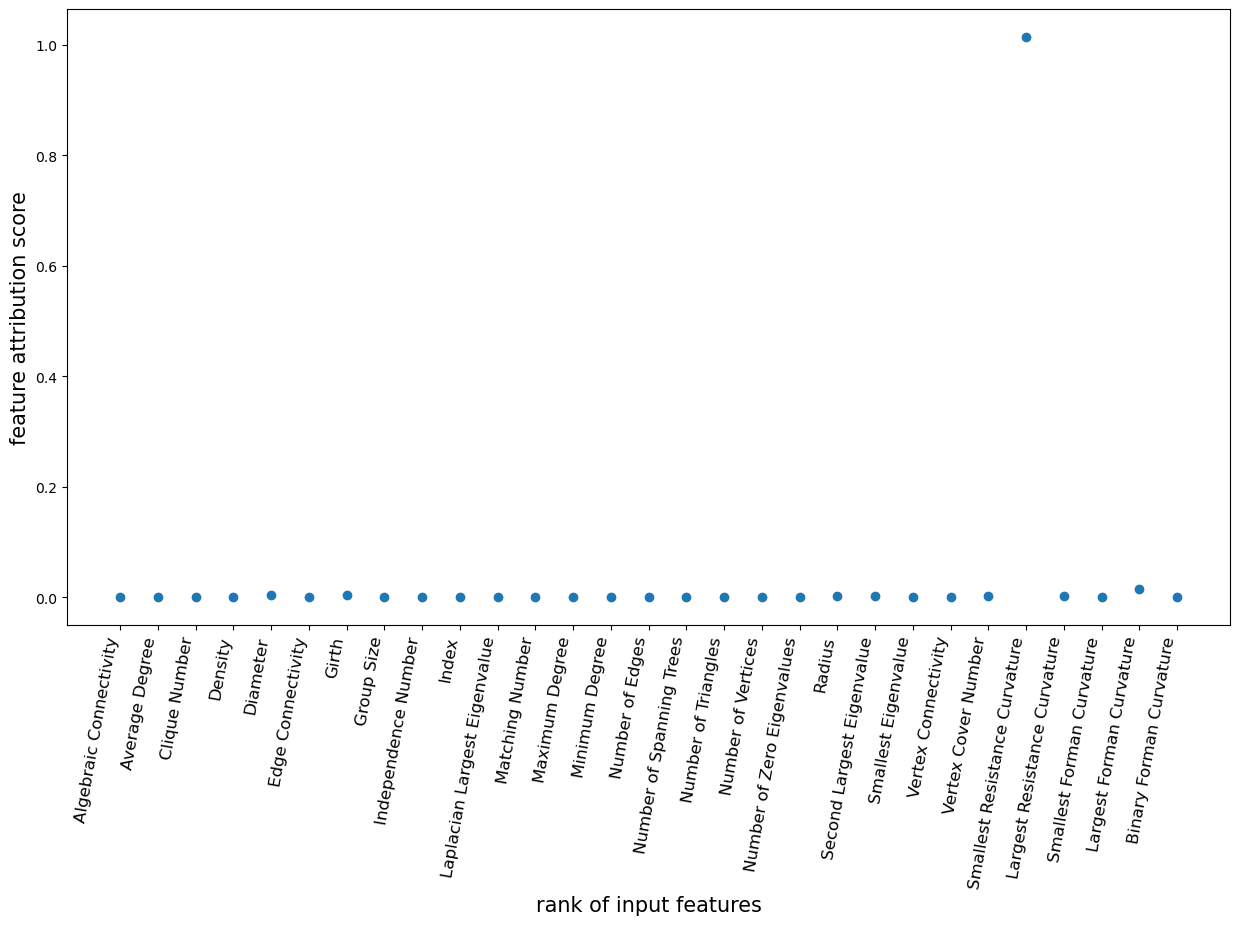

In [39]:
import matplotlib.pyplot as plt
feature_names = X.columns
plt.figure(figsize=(15, 8))
plt.scatter(np.arange(29)+1, model.feature_score.detach().numpy())
plt.xticks(ticks=np.arange(29) + 1, labels=feature_names, rotation=80, ha='right', fontsize=12)
plt.xlabel('Input Features', fontsize=15)
plt.xlabel('rank of input features', fontsize=15)
plt.ylabel('feature attribution score', fontsize=15)

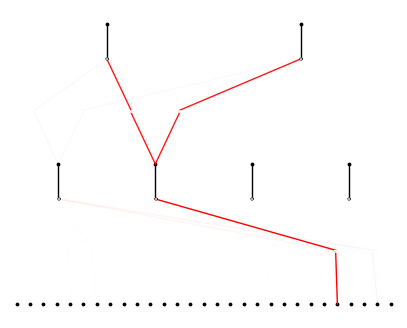

In [40]:
model.plot()

In [97]:
print(model)

MultKAN(
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
  )
)


zsh:1: no matches found: plt.figure(figsize=(10, 5))


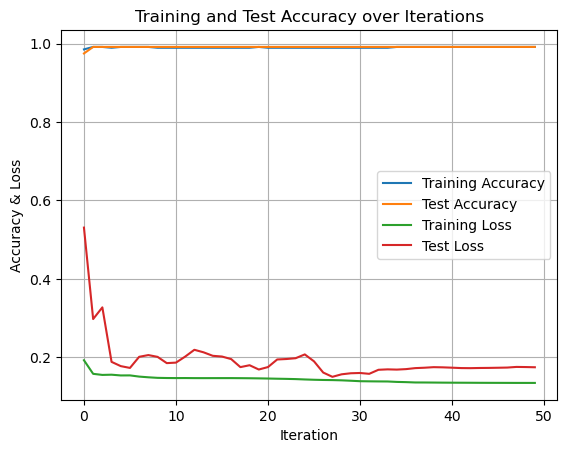

In [98]:
##import matplotlib.pyplot as plt
!plt.figure(figsize=(10, 5))
plt.plot(result["train_acc"], label='Training Accuracy')
plt.plot(result["test_acc"], label='Test Accuracy')
plt.plot(result["train_loss"], label='Training Loss')
plt.plot(result["test_loss"], label='Test Loss')
plt.title('Training and Test Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy & Loss')
plt.legend()
plt.grid(True)
plt.show()

In [99]:
model.feature_score

tensor([3.8752e-02, 1.2259e-05, 3.5238e-05, 2.0105e-05, 6.2927e-03, 5.8404e-06,
        4.6385e-05, 7.4452e-02, 2.9853e-06, 6.1519e-06, 6.0230e-06, 2.9370e-05,
        1.9586e-05, 1.1567e-05, 4.5686e-04, 2.2907e-14, 9.6710e-06, 4.4044e-05,
        2.4277e-04, 4.7393e-02, 1.0455e-04, 1.7612e-05, 4.4086e-06, 1.2368e-03,
        9.4923e-01, 2.7758e-02, 7.9405e-05, 1.9531e-02, 4.1216e-06],
       grad_fn=<MeanBackward1>)

In [100]:
model.prune()

saving model version 0.4


MultKAN(
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
  )
)

In [101]:
model.refine(10)

saving model version 0.4


MultKAN(
  (act_fun): ModuleList(
    (0): KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0): Symbolic_KANLayer()
  )
)